# 1. Pivot Point (PP)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv("datasets/eurusd_pivot.csv", index_col="time", parse_dates=["time"])
data

,Open,High,Low,Close
time,,,,
2019-01-01 22:00:00,1.14649,1.14658,1.14630,1.14648
2019-01-01 22:30:00,1.14653,1.14653,1.14616,1.14641
2019-01-01 23:00:00,1.14640,1.14678,1.14579,1.14665
2019-01-01 23:30:00,1.14669,1.14672,1.14614,1.14614
2019-01-02 00:00:00,1.14614,1.14628,1.14575,1.14582
...,...,...,...,...
2020-12-30 21:30:00,1.22947,1.23019,1.22946,1.23000
2020-12-30 22:00:00,1.22979,1.23000,1.22935,1.22956
2020-12-30 22:30:00,1.22958,1.22984,1.22945,1.22970


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24856 entries, 2019-01-01 22:00:00 to 2020-12-30 23:30:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    24856 non-null  float64
 1   High    24856 non-null  float64
 2   Low     24856 non-null  float64
 3   Close   24856 non-null  float64
dtypes: float64(4)
memory usage: 970.9 KB


In [4]:
data.index

DatetimeIndex(['2019-01-01 22:00:00', '2019-01-01 22:30:00',
               '2019-01-01 23:00:00', '2019-01-01 23:30:00',
               '2019-01-02 00:00:00', '2019-01-02 00:30:00',
               '2019-01-02 01:00:00', '2019-01-02 01:30:00',
               '2019-01-02 02:00:00', '2019-01-02 02:30:00',
               ...
               '2020-12-30 19:00:00', '2020-12-30 19:30:00',
               '2020-12-30 20:00:00', '2020-12-30 20:30:00',
               '2020-12-30 21:00:00', '2020-12-30 21:30:00',
               '2020-12-30 22:00:00', '2020-12-30 22:30:00',
               '2020-12-30 23:00:00', '2020-12-30 23:30:00'],
              dtype='datetime64[ns]', name='time', length=24856, freq=None)

In [5]:
data = data.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close"})
data

,open,high,low,close
time,,,,
2019-01-01 22:00:00,1.14649,1.14658,1.14630,1.14648
2019-01-01 22:30:00,1.14653,1.14653,1.14616,1.14641
2019-01-01 23:00:00,1.14640,1.14678,1.14579,1.14665
2019-01-01 23:30:00,1.14669,1.14672,1.14614,1.14614
2019-01-02 00:00:00,1.14614,1.14628,1.14575,1.14582
...,...,...,...,...
2020-12-30 21:30:00,1.22947,1.23019,1.22946,1.23000
2020-12-30 22:00:00,1.22979,1.23000,1.22935,1.22956
2020-12-30 22:30:00,1.22958,1.22984,1.22945,1.22970


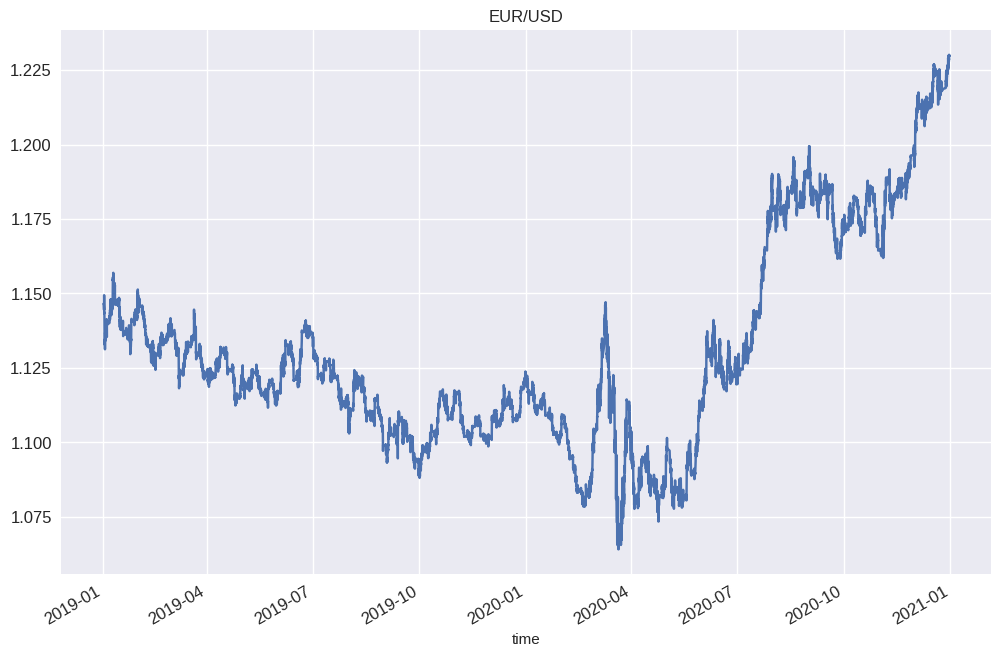

In [6]:
data.close.plot(figsize=(12, 8), title="EUR/USD", fontsize=12)
plt.show()

In [7]:
# Timezone conversion
print(data.index.tz)

None


In [8]:
# Localize to UTC time
data = data.tz_localize("UTC")
data

,open,high,low,close
time,,,,
2019-01-01 22:00:00+00:00,1.14649,1.14658,1.14630,1.14648
2019-01-01 22:30:00+00:00,1.14653,1.14653,1.14616,1.14641
2019-01-01 23:00:00+00:00,1.14640,1.14678,1.14579,1.14665
2019-01-01 23:30:00+00:00,1.14669,1.14672,1.14614,1.14614
2019-01-02 00:00:00+00:00,1.14614,1.14628,1.14575,1.14582
...,...,...,...,...
2020-12-30 21:30:00+00:00,1.22947,1.23019,1.22946,1.23000
2020-12-30 22:00:00+00:00,1.22979,1.23000,1.22935,1.22956
2020-12-30 22:30:00+00:00,1.22958,1.22984,1.22945,1.22970


In [9]:
print(data.index.tz)

UTC


In [10]:
# Resample to daily (NY close)
close = data.close.to_frame().copy()
close.head(15)

,close
time,
2019-01-01 22:00:00+00:00,1.14648
2019-01-01 22:30:00+00:00,1.14641
2019-01-01 23:00:00+00:00,1.14665
2019-01-01 23:30:00+00:00,1.14614
2019-01-02 00:00:00+00:00,1.14582
2019-01-02 00:30:00+00:00,1.14565
2019-01-02 01:00:00+00:00,1.14524
2019-01-02 01:30:00+00:00,1.14523
2019-01-02 02:00:00+00:00,1.14485


In [11]:
close.resample("D").last()

,close
time,
2019-01-01 00:00:00+00:00,1.14614
2019-01-02 00:00:00+00:00,1.13125
2019-01-03 00:00:00+00:00,1.13902
2019-01-04 00:00:00+00:00,1.13951
2019-01-05 00:00:00+00:00,NaN
...,...
2020-12-26 00:00:00+00:00,NaN
2020-12-27 00:00:00+00:00,1.22040
2020-12-28 00:00:00+00:00,1.22197


In [12]:
close.head(60)

,close
time,
2019-01-01 22:00:00+00:00,1.14648
2019-01-01 22:30:00+00:00,1.14641
2019-01-01 23:00:00+00:00,1.14665
2019-01-01 23:30:00+00:00,1.14614
2019-01-02 00:00:00+00:00,1.14582
2019-01-02 00:30:00+00:00,1.14565
2019-01-02 01:00:00+00:00,1.14524
2019-01-02 01:30:00+00:00,1.14523
2019-01-02 02:00:00+00:00,1.14485


In [14]:
close.resample("D", offset="17h").last().dropna()

,close
time,
2019-01-01 17:00:00+00:00,1.13564
2019-01-02 17:00:00+00:00,1.13986
2019-01-03 17:00:00+00:00,1.14088
2019-01-04 17:00:00+00:00,1.13951
2019-01-06 17:00:00+00:00,1.14673
...,...
2020-12-24 17:00:00+00:00,1.21849
2020-12-27 17:00:00+00:00,1.22130
2020-12-28 17:00:00+00:00,1.22519


In [15]:
# OHLC resampling
aggregation_dict = {"open": "first", "high": "max", "low": "min", "close": "last"}
daily_data = data.resample("D", offset="17h").agg(aggregation_dict).dropna()
daily_data

,open,high,low,close
time,,,,
2019-01-01 17:00:00+00:00,1.14649,1.14970,1.13421,1.13564
2019-01-02 17:00:00+00:00,1.13565,1.14112,1.13091,1.13986
2019-01-03 17:00:00+00:00,1.13982,1.14190,1.13458,1.14088
2019-01-04 17:00:00+00:00,1.14092,1.14119,1.13932,1.13951
2019-01-06 17:00:00+00:00,1.13974,1.14728,1.13972,1.14673
...,...,...,...,...
2020-12-24 17:00:00+00:00,1.21820,1.21891,1.21780,1.21849
2020-12-27 17:00:00+00:00,1.21892,1.22504,1.21812,1.22130
2020-12-28 17:00:00+00:00,1.22132,1.22752,1.22027,1.22519


In [16]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 625 entries, 2019-01-01 17:00:00+00:00 to 2020-12-30 17:00:00+00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    625 non-null    float64
 1   high    625 non-null    float64
 2   low     625 non-null    float64
 3   close   625 non-null    float64
dtypes: float64(4)
memory usage: 24.4 KB


In [18]:
# Merge intraday & daily data
daily_data.columns = ["open_d", "high_d", "low_d", "close_d"]
daily_data

,open_d,high_d,low_d,close_d
time,,,,
2019-01-01 17:00:00+00:00,1.14649,1.14970,1.13421,1.13564
2019-01-02 17:00:00+00:00,1.13565,1.14112,1.13091,1.13986
2019-01-03 17:00:00+00:00,1.13982,1.14190,1.13458,1.14088
2019-01-04 17:00:00+00:00,1.14092,1.14119,1.13932,1.13951
2019-01-06 17:00:00+00:00,1.13974,1.14728,1.13972,1.14673
...,...,...,...,...
2020-12-24 17:00:00+00:00,1.21820,1.21891,1.21780,1.21849
2020-12-27 17:00:00+00:00,1.21892,1.22504,1.21812,1.22130
2020-12-28 17:00:00+00:00,1.22132,1.22752,1.22027,1.22519


In [19]:
daily_data.shift().dropna()
daily_data

,open_d,high_d,low_d,close_d
time,,,,
2019-01-01 17:00:00+00:00,1.14649,1.14970,1.13421,1.13564
2019-01-02 17:00:00+00:00,1.13565,1.14112,1.13091,1.13986
2019-01-03 17:00:00+00:00,1.13982,1.14190,1.13458,1.14088
2019-01-04 17:00:00+00:00,1.14092,1.14119,1.13932,1.13951
2019-01-06 17:00:00+00:00,1.13974,1.14728,1.13972,1.14673
...,...,...,...,...
2020-12-24 17:00:00+00:00,1.21820,1.21891,1.21780,1.21849
2020-12-27 17:00:00+00:00,1.21892,1.22504,1.21812,1.22130
2020-12-28 17:00:00+00:00,1.22132,1.22752,1.22027,1.22519


In [20]:
pd.concat([data, daily_data.shift().dropna()], axis=1).ffill().dropna().head(60)

,open,high,low,close,open_d,high_d,low_d,close_d
time,,,,,,,,
2019-01-02 17:00:00+00:00,1.13565,1.13570,1.13351,1.13472,1.14649,1.14970,1.13421,1.13564
2019-01-02 17:30:00+00:00,1.13472,1.13510,1.13313,1.13353,1.14649,1.14970,1.13421,1.13564
2019-01-02 18:00:00+00:00,1.13355,1.13364,1.13262,1.13302,1.14649,1.14970,1.13421,1.13564
2019-01-02 18:30:00+00:00,1.13298,1.13309,1.13273,1.13280,1.14649,1.14970,1.13421,1.13564
2019-01-02 19:00:00+00:00,1.13277,1.13400,1.13250,1.13374,1.14649,1.14970,1.13421,1.13564
2019-01-02 19:30:00+00:00,1.13370,1.13444,1.13352,1.13438,1.14649,1.14970,1.13421,1.13564
2019-01-02 20:00:00+00:00,1.13441,1.13461,1.13406,1.13454,1.14649,1.14970,1.13421,1.13564
2019-01-02 20:30:00+00:00,1.13453,1.13478,1.13436,1.13458,1.14649,1.14970,1.13421,1.13564
2019-01-02 21:00:00+00:00,1.13458,1.13458,1.13401,1.13420,1.14649,1.14970,1.13421,1.13564


In [21]:
data = pd.concat([data, daily_data.shift().dropna()], axis=1).ffill().dropna()
data

,open,high,low,close,open_d,high_d,low_d,close_d
time,,,,,,,,
2019-01-02 17:00:00+00:00,1.13565,1.13570,1.13351,1.13472,1.14649,1.14970,1.13421,1.13564
2019-01-02 17:30:00+00:00,1.13472,1.13510,1.13313,1.13353,1.14649,1.14970,1.13421,1.13564
2019-01-02 18:00:00+00:00,1.13355,1.13364,1.13262,1.13302,1.14649,1.14970,1.13421,1.13564
2019-01-02 18:30:00+00:00,1.13298,1.13309,1.13273,1.13280,1.14649,1.14970,1.13421,1.13564
2019-01-02 19:00:00+00:00,1.13277,1.13400,1.13250,1.13374,1.14649,1.14970,1.13421,1.13564
...,...,...,...,...,...,...,...,...
2020-12-30 21:30:00+00:00,1.22947,1.23019,1.22946,1.23000,1.22520,1.23102,1.22361,1.22791
2020-12-30 22:00:00+00:00,1.22979,1.23000,1.22935,1.22956,1.22520,1.23102,1.22361,1.22791
2020-12-30 22:30:00+00:00,1.22958,1.22984,1.22945,1.22970,1.22520,1.23102,1.22361,1.22791


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24924 entries, 2019-01-02 17:00:00+00:00 to 2020-12-30 23:30:00+00:00
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open     24924 non-null  float64
 1   high     24924 non-null  float64
 2   low      24924 non-null  float64
 3   close    24924 non-null  float64
 4   open_d   24924 non-null  float64
 5   high_d   24924 non-null  float64
 6   low_d    24924 non-null  float64
 7   close_d  24924 non-null  float64
dtypes: float64(8)
memory usage: 1.7 MB
